In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel("KSI_full.xlsx")
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [48]:
df.shape

(16860, 61)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

In [7]:
df.DIVISION.value_counts()

42          1584
32          1160
23          1109
41          1091
22          1066
14          1023
43           952
31           866
53           747
52           726
12           723
51           714
33           698
13           666
11           642
55           566
54           489
54,55        242
<Null>       196
51,52        152
52,14        138
11,14        136
23,22        123
12,11        113
41,43        108
33,32        103
41,33        102
53,13         77
32,13         72
33,42         70
54,33         58
41,54         49
53,51         46
53,32         44
23,31         38
55,51         35
53,52         32
53,14         26
41,54,33      16
53,52,14      13
53,32,13       9
13,14          9
0,52           7
41,55          6
41,43,42       5
0,51           3
11,13          3
22,11          2
43,42          2
41,33,42       2
53,33,32       1
Name: DIVISION, dtype: int64

In [13]:
# Actual number of nulls in each column
number_of_records = df.shape[0]
#df_nulls = pd.DataFrame()
for (columnName, columnData) in df.iteritems():
    print('Column Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    count = 0
    for i in columnData.values:
        if i == '<Null>':
            count = count + 1
    
    print("Number of nulls: ", count)
    print("Percentage of nulls: ", (count/number_of_records)*100)
    print("----------------------------- \n")
#     df_nulls[columnName] = columnName
#     df_nulls[countNulls] = count
#     df_nulls[percentNulls] = (count/number_of_records)*100

Column Name :  X
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  Y
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  INDEX_
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  ACCNUM
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  YEAR
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  DATE
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  TIME
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  HOUR
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  STREET1
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  STREET2
Number of nulls:  1510
Percentage of nulls:  8.956109134045077
----------------------------- 


In [49]:
# Target period is entire 2020
# Extracting month
import datetime

df['DATE_FIXED'] = df['DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f')).date())
df['MONTH'] = df['DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f')).month)

In [50]:
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,MONTH,DATE_FIXED
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1,3,2006-03-11
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2,3,2006-03-11
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3,3,2006-03-11
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4,3,2006-03-11
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5,3,2006-03-12


### Selecting variables for modelling

In [76]:
df_subset = df[['ACCNUM', 'YEAR', 'HOUR', 'MONTH', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'DIVISION',
               'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
               'IMPACTYPE', 'INVTYPE', 'VEHTYPE', 'MANOEUVER', 'NEIGHBOURHOOD', 'ACRISK']]

df_subset.head()

,ACCNUM,YEAR,HOUR,MONTH,STREET1,STREET2,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,...,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,VEHTYPE,MANOEUVER,NEIGHBOURHOOD,ACRISK
0,892658,2006,8,3,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,11,43.656345,...,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,"Automobile, Station Wagon",Turning Left,High Park North (88),1.0
1,892658,2006,8,3,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,11,43.656345,...,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,Other,<Null>,High Park North (88),1.0
2,892810,2006,9,3,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,42,43.801943,...,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,Motorcycle,Turning Right,Rouge (131),1.0
3,892810,2006,9,3,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,42,43.801943,...,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,"Automobile, Station Wagon",Going Ahead,Rouge (131),1.0
4,892682,2006,2,3,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,41,43.734945,...,No Control,Clear,Dark,Dry,Pedestrian Collisions,Driver,"Automobile, Station Wagon",Going Ahead,Eglinton East (138),1.0


In [77]:
df_subset.shape

(16860, 22)

Response var is Acrisk

## Splitting into Analysis Phase, Dead Period and Target Phase

In [78]:
# Target phase is last year which is 2020
# Dead period is 1 month i.e. Dec 2019
# Analysis period is the rest

df_test = df_subset[df_subset['YEAR'] == 2020]

In [79]:
df_2019 = df_subset[df_subset['YEAR'] == 2019]
df_dead = df_2019[df_2019['MONTH'] == 12]
df_dead.head()

,ACCNUM,YEAR,HOUR,MONTH,STREET1,STREET2,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,...,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,VEHTYPE,MANOEUVER,NEIGHBOURHOOD,ACRISK
16009,9002484268,2019,21,12,LAKE SHORE BLVD E,LOWER JARVIS ST,Major Arterial,Toronto and East York,51,43.645556,...,Traffic Signal,Clear,"Dark, artificial",Dry,Turning Movement,Passenger,<Null>,<Null>,Waterfront Communities-The Island (77),1.0
16126,9002496688,2019,23,12,2901 JANE ST,<Null>,Major Arterial,Etobicoke York,31,43.753241,...,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Driver,"Automobile, Station Wagon",Going Ahead,Glenfield-Jane Heights (25),0.0
16132,9002496688,2019,23,12,2901 JANE ST,<Null>,Major Arterial,Etobicoke York,31,43.753241,...,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Pedestrian,<Null>,<Null>,Glenfield-Jane Heights (25),1.5
16140,9002500056,2019,14,12,1325 ST CLAIR AVE W,<Null>,Major Arterial,Etobicoke York,13,43.676577,...,No Control,Clear,Daylight,Dry,Pedestrian Collisions,Driver,"Automobile, Station Wagon",Reversing,Corso Italia-Davenport (92),0.0
16147,9002500056,2019,14,12,1325 ST CLAIR AVE W,<Null>,Major Arterial,Etobicoke York,13,43.676577,...,No Control,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,<Null>,<Null>,Corso Italia-Davenport (92),1.5


In [80]:
df_train = df_subset[df_subset['YEAR'] < 2020]
df_train = df_train.iloc[:-88]
df_train.shape

(16139, 22)

In [81]:
df_dead.shape

(88, 22)

In [82]:
df_test.shape

(633, 22)

In [83]:
88+633+16139

16860

In [86]:
df_train.tail()

,ACCNUM,YEAR,HOUR,MONTH,STREET1,STREET2,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,...,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,VEHTYPE,MANOEUVER,NEIGHBOURHOOD,ACRISK
16510,9002262069,2019,12,11,KENNEDY RD,BRIGSTOCK RD,Major Arterial,Scarborough,41,43.761225,...,No Control,Clear,Daylight,Dry,Turning Movement,Passenger,<Null>,<Null>,Dorset Park (126),0.0
16605,9002263717,2019,17,11,1841 WILSON AVE,<Null>,Major Arterial,Etobicoke York,31,43.717410,...,No Control,Clear,Dusk,Dry,Cyclist Collisions,Driver,Passenger Van,Turning Right,Downsview-Roding-CFB (26),0.0
16608,9002263717,2019,17,11,1841 WILSON AVE,<Null>,Major Arterial,Etobicoke York,31,43.717410,...,No Control,Clear,Dusk,Dry,Cyclist Collisions,Cyclist,Bicycle,Going Ahead,Downsview-Roding-CFB (26),1.5
16610,9002266612,2019,2,11,3207 KINGSTON RD,<Null>,Major Arterial,Scarborough,43,43.729338,...,No Control,Clear,"Dark, artificial",Dry,Rear End,Driver,"Automobile, Station Wagon",Going Ahead,Cliffcrest (123),0.0
16611,9002266612,2019,2,11,3207 KINGSTON RD,<Null>,Major Arterial,Scarborough,43,43.729338,...,No Control,Clear,"Dark, artificial",Dry,Rear End,Driver,"Automobile, Station Wagon",Going Ahead,Cliffcrest (123),1.5


### Note: The response variable ACRISK has been generated in excel by using the below formula </b>

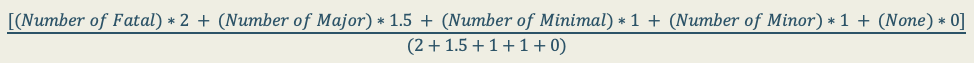

## Preprocessing Training Data

In [218]:
df_train_group = df_train.groupby(['STREET1', 'STREET2', 'LOCCOORD']).agg({'ACCNUM': lambda x: x.nunique(),
                                                             'INVTYPE': lambda x: x.count(),
                                                            'HOUR':'mean', 
                                                    'ROAD_CLASS':lambda x: x.max(), 
                                                     'DISTRICT':lambda x: x.max(), 
                                                     'DIVISION': lambda x: x.mode(),
                                                     'LATITUDE': 'mean',
                                                     'LONGITUDE': 'mean', 
                                                     'TRAFFCTL': lambda x: x.max(),
                                                     'VISIBILITY': lambda x: x.max(),
                                                     'LIGHT': lambda x: x.max(),
                                                     'RDSFCOND': lambda x: x.max(),
                                                     'IMPACTYPE': lambda x: x.max(),
                                                     'ACRISK': 'mean'
                                                     #'NEIGHBOURHOOD': lambda x: x.max()
                                                     # 'VEHTYPE': lambda x: x.max()
                                                      #'MANOEUVER': lambda x: x.max()
                                                    }).reset_index()
# 
# VEHTYPE and MANOEUVER - giving error - will resolve later                                                     ' 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:944: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


In [219]:
df_train_y_group = df_train_group[['ACRISK']]
df_train_x_group = df_train_group[['ACCNUM','HOUR', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'DIVISION',
               'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
               'IMPACTYPE', 'INVTYPE']]

In [220]:
df_train_x_group.tail()

,ACCNUM,HOUR,STREET1,STREET2,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE
4764,1,22.0,YORK ST,RICHMOND ST W,Major Arterial,Toronto and East York,52,43.650431,-79.384639,Intersection,Traffic Signal,Rain,"Dark, artificial",Wet,Angle,2
4765,1,15.0,YORK ST,YORK ST GARDINER W RAMP,Major Arterial,Toronto and East York,52,43.641421,-79.380862,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,3
4766,1,18.0,YORKLAND Blvd,CONSUMERS Rd,Minor Arterial,North York,33,43.772945,-79.336090,Mid-Block,No Control,Clear,Daylight,Wet,SMV Other,1
4767,1,1.0,YORKSHIRE RD,IONVIEW RD,Local,Scarborough,41,43.740045,-79.274790,Intersection,Stop Sign,Clear,"Dark, artificial",Dry,SMV Other,4
4768,1,15.0,YORKVILLE AVE,YONGE ST,Collector,Toronto and East York,53,43.671492,-79.389255,Mid-Block,No Control,Clear,Daylight,Dry,Pedestrian Collisions,3


In [221]:
df_train_y_group

,ACRISK
0,0.750
1,1.000
2,1.500
3,0.750
4,1.250
...,...
4764,0.750
4765,0.500
4766,1.500
4767,0.625


In [178]:
df_train_x_group['NEIGHBOURHOOD'].value_counts()

Waterfront Communities-The Island (77)    172
West Humber-Clairville (1)                140
Rouge (131)                               114
Bay Street Corridor (76)                  104
South Riverdale (70)                       93
                                         ... 
Guildwood (140)                             9
North St.James Town (74)                    9
Lawrence Park North (105)                   9
Maple Leaf (29)                             7
Lambton Baby Point (114)                    3
Name: NEIGHBOURHOOD, Length: 140, dtype: int64

In [212]:
from sklearn.feature_extraction import FeatureHasher

fh1 = FeatureHasher(n_features=11, input_type='string')
fh2 = FeatureHasher(n_features=6, input_type='string')
fh3 = FeatureHasher(n_features=11, input_type='string')
fh4 = FeatureHasher(n_features=9, input_type='string')
fh5 = FeatureHasher(n_features=10, input_type='string')

hashed_features1 = fh1.fit_transform(df_train_x_group['ROAD_CLASS'])
hashed_features2 = fh2.fit_transform(df_train_x_group['DISTRICT'])
hashed_features3 = fh3.fit_transform(df_train_x_group['TRAFFCTL'])
hashed_features4 = fh4.fit_transform(df_train_x_group['VISIBILITY'])
hashed_features5 = fh4.fit_transform(df_train_x_group['LIGHT'])
hashed_features6 = fh4.fit_transform(df_train_x_group['RDSFCOND'])
hashed_features7 = fh5.fit_transform(df_train_x_group['IMPACTYPE'])
hashed_features8 = fh4.fit_transform(df_train_x_group['RDSFCOND'])


hashed_features1 = hashed_features1.toarray()
hashed_features2 = hashed_features2.toarray()
hashed_features3 = hashed_features3.toarray()
hashed_features4 = hashed_features4.toarray()
hashed_features5 = hashed_features5.toarray()
hashed_features6 = hashed_features6.toarray()
hashed_features7 = hashed_features7.toarray()
hashed_features8 = hashed_features8.toarray()


#pd.DataFrame(hashed_features1)
#

df_train_x_final = pd.concat([df_train_x_group[['ACCNUM', 'INVTYPE', 'HOUR', 'LATITUDE', 'LONGITUDE']],
                              pd.DataFrame(hashed_features1), pd.DataFrame(hashed_features2),  pd.DataFrame(hashed_features3),
                              pd.DataFrame(hashed_features4), pd.DataFrame(hashed_features5),
                              pd.DataFrame(hashed_features6), pd.DataFrame(hashed_features7),
                              pd.DataFrame(hashed_features8)], axis=1)
                             
df_train_x_final.head()

,ACCNUM,INVTYPE,HOUR,LATITUDE,LONGITUDE,0,1,2,3,4,...,9,0,1,2,3,4,5,6,7,8
0,1,2,12.0,43.696445,-79.29229,0.0,0.0,1.0,-1.0,1.0,...,-1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
1,1,3,2.0,43.751145,-79.30649,0.0,0.0,0.0,1.0,1.0,...,-4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,1,3,12.0,43.758837,-79.52151,-1.0,0.0,1.0,1.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
3,1,2,12.0,43.696645,-79.48979,0.0,0.0,1.0,-1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
4,1,2,11.0,43.778545,-79.33799,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


## Preparing the Test Set

In [214]:
df_test_group = df_test.groupby(['STREET1', 'STREET2', 'LOCCOORD']).agg({'ACCNUM': lambda x: x.nunique(),
                                                             'INVTYPE': lambda x: x.count(),
                                                            'HOUR':'mean', 
                                                    'ROAD_CLASS':lambda x: x.max(), 
                                                     'DISTRICT':lambda x: x.max(), 
                                                     'DIVISION': lambda x: x.mode(),
                                                     'LATITUDE': 'mean',
                                                     'LONGITUDE': 'mean', 
                                                     'TRAFFCTL': lambda x: x.max(),
                                                     'VISIBILITY': lambda x: x.max(),
                                                     'LIGHT': lambda x: x.max(),
                                                     'RDSFCOND': lambda x: x.max(),
                                                     'IMPACTYPE': lambda x: x.max(),
                                                     'ACRISK': 'mean'
                                                     #'NEIGHBOURHOOD': lambda x: x.max()
                                                     # 'VEHTYPE': lambda x: x.max()
                                                      #'MANOEUVER': lambda x: x.max()
                                                    }).reset_index()

In [216]:
df_test_y_group = df_test_group[['ACRISK']]
df_test_x_group = df_test_group[['ACCNUM','HOUR', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'DIVISION',
               'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
               'IMPACTYPE', 'INVTYPE']]

In [249]:
print("Number of intersections in test set: ", len(df_test_y_group))

Number of intersections in test set:  263


In [217]:
fh1 = FeatureHasher(n_features=11, input_type='string')
fh2 = FeatureHasher(n_features=6, input_type='string')
fh3 = FeatureHasher(n_features=11, input_type='string')
fh4 = FeatureHasher(n_features=9, input_type='string')
fh5 = FeatureHasher(n_features=10, input_type='string')

hashed_features1 = fh1.fit_transform(df_test_x_group['ROAD_CLASS'])
hashed_features2 = fh2.fit_transform(df_test_x_group['DISTRICT'])
hashed_features3 = fh3.fit_transform(df_test_x_group['TRAFFCTL'])
hashed_features4 = fh4.fit_transform(df_test_x_group['VISIBILITY'])
hashed_features5 = fh4.fit_transform(df_test_x_group['LIGHT'])
hashed_features6 = fh4.fit_transform(df_test_x_group['RDSFCOND'])
hashed_features7 = fh5.fit_transform(df_test_x_group['IMPACTYPE'])
hashed_features8 = fh4.fit_transform(df_test_x_group['RDSFCOND'])


hashed_features1 = hashed_features1.toarray()
hashed_features2 = hashed_features2.toarray()
hashed_features3 = hashed_features3.toarray()
hashed_features4 = hashed_features4.toarray()
hashed_features5 = hashed_features5.toarray()
hashed_features6 = hashed_features6.toarray()
hashed_features7 = hashed_features7.toarray()
hashed_features8 = hashed_features8.toarray()


#pd.DataFrame(hashed_features1)
#

df_test_x_final = pd.concat([df_test_x_group[['ACCNUM', 'INVTYPE', 'HOUR', 'LATITUDE', 'LONGITUDE']],
                              pd.DataFrame(hashed_features1), pd.DataFrame(hashed_features2),  pd.DataFrame(hashed_features3),
                              pd.DataFrame(hashed_features4), pd.DataFrame(hashed_features5),
                              pd.DataFrame(hashed_features6), pd.DataFrame(hashed_features7),
                              pd.DataFrame(hashed_features8)], axis=1)
                             
df_test_x_final.head()

,ACCNUM,INVTYPE,HOUR,LATITUDE,LONGITUDE,0,1,2,3,4,...,9,0,1,2,3,4,5,6,7,8
0,1,3,15,43.641387,-79.375934,-1.0,0.0,1.0,1.0,4.0,...,-4.0,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0
1,1,1,3,43.712428,-79.411739,0.0,-1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,1,2,17,43.688693,-79.420551,0.0,-1.0,2.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
3,1,2,15,43.690203,-79.277072,-1.0,0.0,1.0,1.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
4,1,2,10,43.718902,-79.517765,0.0,-1.0,2.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


## Random Forest Model

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [207]:
# importing all metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, auc, average_precision_score

from sklearn.model_selection import cross_val_score

In [203]:
df_train_x_final.shape

(4769, 80)

In [226]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y = lab_enc.fit_transform(df_train_y_group)
encoded_y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ 50,  78, 109, ..., 109,  37,  22])

In [230]:
df_train_y_group.value_counts()
def convert_y(x):
    if x < 0.5:
        return 0
    elif x <0.75:
        return 1
    elif x<1:
        return 2
    elif x<1.5:
        return 3
    elif x<2:
        return 4
    else:
        return 5
    
df_train_y_group['ACRISK'] = df_train_y_group['ACRISK'].apply(lambda x: convert_y(x))

<ipython-input-230-275e1a7e5c36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_y_group['ACRISK'] = df_train_y_group['ACRISK'].apply(lambda x: convert_y(x))


In [232]:
df_test_y_group['ACRISK'] = df_test_y_group['ACRISK'].apply(lambda x: convert_y(x))

<ipython-input-232-51a3149ccb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_y_group['ACRISK'] = df_test_y_group['ACRISK'].apply(lambda x: convert_y(x))


In [231]:
df_train_y_group

,ACRISK
0,2
1,3
2,4
3,2
4,3
...,...
4764,2
4765,1
4766,4
4767,1


In [246]:
classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 150, random_state = 0)
classifier.fit(df_train_x_final, df_train_y_group.values.ravel())
y_pred = classifier.predict(df_test_x_final)
y_prob = classifier.predict_proba(df_test_x_final)[:,1] #probability with which the prediction is made

print("predicted y: ", y_prob)

predicted y:  [0.70666667 0.00666667 0.03333333 0.04       0.04       0.05333333
 0.14666667 0.04       0.00666667 0.66       0.         0.04
 0.07333333 0.02       0.02666667 0.04666667 0.04       0.
 0.         0.04       0.00666667 0.05333333 0.05333333 0.4
 0.02666667 0.00666667 0.01333333 0.13333333 0.00666667 0.04666667
 0.18       0.01333333 0.71333333 0.14666667 0.05333333 0.01333333
 0.02666667 0.04       0.07333333 0.49333333 0.14666667 0.16
 0.00666667 0.10666667 0.34666667 0.39333333 0.02666667 0.25333333
 0.14       0.00666667 0.48       0.03333333 0.06666667 0.52666667
 0.18666667 0.01333333 0.39333333 0.1        0.06666667 0.00666667
 0.10666667 0.01333333 0.44666667 0.03333333 0.44666667 0.02
 0.06666667 0.49333333 0.10666667 0.02       0.02       0.16
 0.66666667 0.03333333 0.27333333 0.         0.66       0.04666667
 0.38       0.03333333 0.54666667 0.01333333 0.12666667 0.11333333
 0.12       0.04       0.05333333 0.02       0.22       0.44666667
 0.28666667 0.02    

In [248]:
len(df_test_y_group)

263

In [250]:
df_test_y_group['Predicted Risk'] = y_pred
df_test_y_group

<ipython-input-250-3526f63ff1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_y_group['Predicted Risk'] = y_pred


,ACRISK,Predicted Risk,Score_diff
0,1,1,0
1,4,4,0
2,2,2,0
3,3,2,1
4,3,2,1
...,...,...,...
258,2,2,0
259,2,2,0
260,3,2,1
261,4,3,1


In [239]:
df_test_y_group['Score_diff'] = df_test_y_group['ACRISK'].sub(df_test_y_group['Predicted Risk'], axis = 0)
df_test_y_group

<ipython-input-239-74608b5b58ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_y_group['Score_diff'] = df_test_y_group['ACRISK'].sub(df_test_y_group['Predicted Risk'], axis = 0)


,ACRISK,Predicted Risk,Score_diff
0,1,1,0
1,4,4,0
2,2,2,0
3,3,2,1
4,3,2,1
...,...,...,...
258,2,2,0
259,2,2,0
260,3,2,1
261,4,3,1


In [240]:
df_test_y_group.to_csv('Results.csv')

## Which intersection have high risk - Predicted Risk Score 4 and 3

In [252]:
df_test_group_final = pd.concat([df_test_group, df_test_y_group], axis=1)
                             
df_test_group_final.head()

,STREET1,STREET2,LOCCOORD,ACCNUM,INVTYPE,HOUR,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,ACRISK,ACRISK,Predicted Risk,Score_diff
0,12 QUEENS QUAY W,<Null>,Mid-Block,1,3,15,Minor Arterial,Toronto East York,52,43.641387,-79.375934,Stop Sign,Rain,Daylight,Wet,Cyclist Collisions,0.50,1,1,0
1,1208 AVENUE RD,1208 AVENUE RD,Mid-Block,1,1,3,<Null>,<Null>,<Null>,43.712428,-79.411739,No Control,Clear,"Dark, artificial",Dry,SMV Other,1.50,4,4,0
2,1602 BATHURST ST,HEATHDALE RD,Mid-Block,1,2,17,<Null>,<Null>,<Null>,43.688693,-79.420551,No Control,Clear,Daylight,Dry,Pedestrian Collisions,0.75,2,2,0
3,168 CLONMORE DR,<Null>,Mid-Block,1,2,15,Minor Arterial,Scarborough,<Null>,43.690203,-79.277072,No Control,Clear,Daylight,Dry,Pedestrian Collisions,1.00,3,2,1
4,1733 WILSON AV,WILSON AV,Mid-Block,1,2,10,<Null>,<Null>,<Null>,43.718902,-79.517765,No Control,Clear,Daylight,Dry,Pedestrian Collisions,1.25,3,2,1


(array([  1.,   7.,   0.,  29.,   0., 164.,  44.,   0.,  17.,   1.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

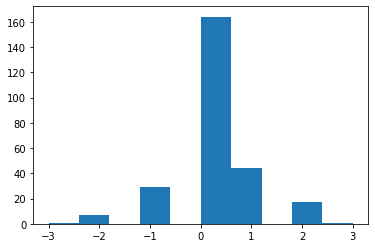

In [253]:
plt.hist(df_test_y_group['Score_diff'])

In [254]:
df_test_group_final.sort_values("Predicted Risk", axis = 0, ascending = False,
                 inplace = True, na_position ='last')


In [256]:
df_test_group_final.head(30)

,STREET1,STREET2,LOCCOORD,ACCNUM,INVTYPE,HOUR,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,ACRISK,ACRISK,Predicted Risk,Score_diff
179,MARTIN GROVE RD,GIHON SPRING DR,Mid-Block,1,1,23,Minor Arterial,Etobicoke York,<Null>,43.754725,-79.600589,No Control,Clear,"Dark, artificial",Dry,SMV Other,1.00,3,4,-1
17,67 POTTERY RD,BROADVIEW AVE,Mid-Block,1,1,2,<Null>,<Null>,<Null>,43.688583,-79.363430,No Control,Rain,"Dark, artificial",Wet,SMV Other,1.50,4,4,0
96,F G GARDINER XY W,LOWER SHERBOURNE ST,Mid-Block,1,1,5,Expressway,Scarborough,51,43.646361,-79.367122,No Control,Rain,"Dark, artificial",Wet,SMV Other,1.50,4,4,0
42,BRENTCLIFFE RD,EGLINTON AV E,Mid-Block,1,1,21,<Null>,<Null>,<Null>,43.715152,-79.357433,No Control,Clear,"Dark, artificial",Dry,SMV Other,1.50,4,4,0
101,FORT YORK BLVD,DAN LECKIE WAY,Intersection,1,2,16,Local,Toronto East York,14,43.639331,-79.397960,Traffic Signal,Rain,Dark,Wet,SMV Other,0.75,2,4,-2
33,BATHURST ST,WOLSELEY ST,Intersection,1,2,9,Major Arterial,Toronto and East York,14,43.648017,-79.404293,Stop Sign,Clear,Daylight,Dry,SMV Other,0.75,2,4,-2
95,F G GARDINER XY E,GARDINER JAMESON AV RAMP,Mid-Block,1,2,2,Expressway,Toronto East York,<Null>,43.633830,-79.437084,No Control,Rain,"Dark, artificial",Wet,SMV Other,1.50,4,4,0
196,POTTERY RD,BROADVIEW AVE,Mid-Block,1,1,22,Minor Arterial,Toronto and East York,54,43.683929,-79.356914,No Control,Clear,"Dark, artificial",Dry,SMV Other,1.50,4,4,0
94,ERINGATE DR,RANGOON RD,Intersection,1,1,20,Collector,Etobicoke York,22,43.662154,-79.576480,No Control,Clear,Daylight,Dry,SMV Other,1.50,4,4,0
49,BURNHAMTHORPE RD,MILL RD,Mid-Block,1,1,19,Major Arterial,Etobicoke York,<Null>,43.639434,-79.583965,No Control,Clear,Daylight,Dry,SMV Other,1.00,3,4,-1


In [258]:
df_test_group_final.to_csv('Results.csv')